In [49]:
# Libraries Sympy and Numpy
from sympy import*
import numpy as np

# To define automatic printing mode (Not needed anymore)
# init_printing()

# For priting with text
from IPython.display import display, Latex

# Plotting Libraries
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.ticker as ticker

#interactive plotting in separate window
#%matplotlib qt 

#normal charts inside notebooks
#%matplotlib inline 

# Use Latex in plots
plt.rcParams['text.usetex'] = False

# 1. IPT System Frequency Splitting Model

- Equations Derivation

In [2]:
# Definition of the symbolic variables

# Resistances --> Coils and Load
R_1, R_2, R_L = symbols('R_1, R_2, R_L',
                       real = True)

# Inductance and Capacitance
C_1, C_2, L_1, L_2, M_i = symbols('C_1, C_2, L_1,L_2, M_i', 
                                 real = True)

# Reactance
X_1, X_2 = symbols('X_1, X_2',
                       real = True)

# Angular frequency
w_e = symbols('w_e', real = True)

# Input Voltage and Current
V_1, I_1 = symbols('V_1, I_1', real = True)

In [3]:
# Reactance in each mesh
#X_1 = (w_e*L_1) - (1/(w_e*C_1))
#X_2 = (w_e*L_2) - (1/(w_e*C_2))

- Equivalent Circuit's Matrix Representation: $[Z][I] = [V]$

In [4]:
# Impedance Matriz [Z]
Z_m = Matrix([[R_1 + (I*X_1), I*w_e*M_i],
            [I*w_e*M_i, R_2 + R_L + (I*X_2)]])

# Voltage Vector
V_m = Matrix([[V_1], [0]])

In [5]:
# Solve the System of Equations
I_m = Z_m.inv()*V_m

In [6]:
# Input Current
result_I = "Input Current: \n $${} = {}$$".format(latex(I_1), 
                                                 latex(I_m[0]))
display(Latex(result_I))

# Separate Numerator and denominator of I1
I_1_n, I_1_d = fraction(I_m[0])

<IPython.core.display.Latex object>

In [7]:
# Operate separately each polynomial
display(factor(I_1_n))
display(factor(I_1_d + (I*(M_i**2)*(w_e**2))))

-I*V_1*(R_2 + R_L + I*X_2)

-I*(R_1 + I*X_1)*(R_2 + R_L + I*X_2)

In [8]:
# Reconstruct the factored result
I_1 = (factor(I_1_n))/(factor(I_1_d + (I*(M_i**2)*(w_e**2))) 
                       - (I*(M_i**2)*(w_e**2)))
display(simplify(I_1))

V_1*(R_2 + R_L + I*X_2)/(M_i**2*w_e**2 + (R_1 + I*X_1)*(R_2 + R_L + I*X_2))

- Input Impedance Expression $Z_{in}$:

In [9]:
Z_in = V_1*(1/simplify(I_1))
display(Z_in)

(M_i**2*w_e**2 + (R_1 + I*X_1)*(R_2 + R_L + I*X_2))/(R_2 + R_L + I*X_2)

- Freq. Splitting occurs when $\Im(Z_{in}) = 0$

In [10]:
# Assume both reactance are equal for simplicity
# Common reactance X_e
X_e = symbols('X_e', real = True)

# Substitute the variable
Z_in = Z_in.subs([(X_1, X_e), (X_2, X_e)])

# Imaginary part of Zin
simplify(im(Z_in))

X_e*(-M_i**2*w_e**2 - R_1*R_2 - R_1*R_L + X_e**2 + (R_2 + R_L)*(R_1 + R_2 + R_L))/(X_e**2 + (R_2 + R_L)**2)

In [11]:
# Operate separately
factor(-(R_1*R_2) - (R_1*R_L) + ((R_2 + R_L)*(R_1 + R_2 + R_L)))

(R_2 + R_L)**2

## a) 1st Condition to only have one non-trivial root: $\Delta < 0$

In [170]:
# Angular Resonance frequency (central)
w_c = 2*np.pi*(800e3)  # 800 kHz

# Assume coils' self-inductance equal [H]
L_c = 53.49e-6

# Frequency-dependent parameter
beta_c = (w_c*L_c)**2

In [171]:
# Formula for condition Delta
Delta_c = lambda R, beta, k: (((R**2) - (2*beta))**2) - (4*(beta**2)*(1 - (k**2)))

# Inductive Coupling Coefficient Range k_i
k_i = np.arange(0, 1 + 0.01, 0.01)
print(k_i.shape)
print(k_i[-1])

# Load Resistance [ohms]
R_L = np.arange(1., 1000. + 1., 1.)
print(R_L.shape)
print(R_L[-1])

# Create a mesh
k_i_m, R_L_m = np.meshgrid(k_i, R_L)

# Calculate the function Delta
f_delta = Delta_c(R_L_m, beta_c, k_i_m)
print(f_delta.shape)

(101,)
1.0
(1000,)
1000.0
(1000, 101)


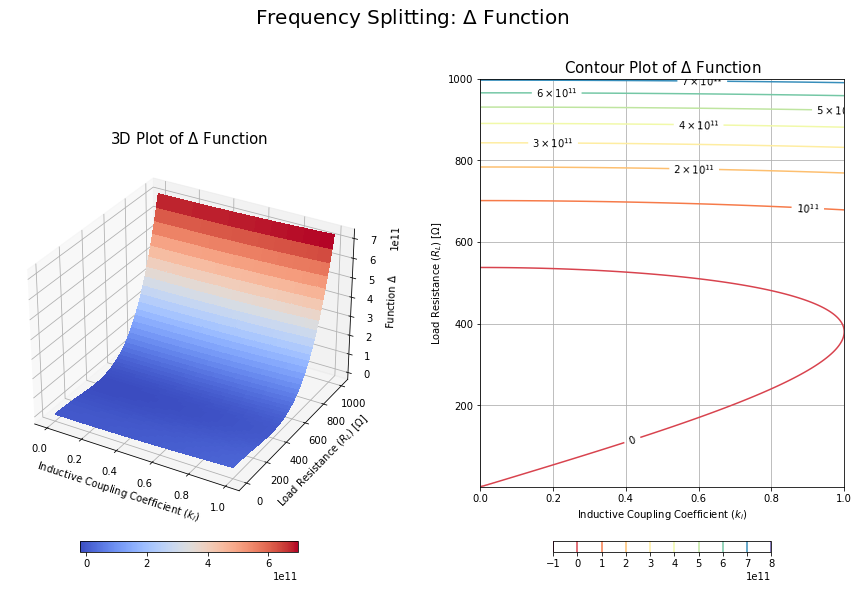

In [172]:
#interactive plotting in separate window
#%matplotlib qt 

#normal charts inside notebooks
%matplotlib inline 

# Set the plot --> size(width, height)
fig1 = plt.figure(figsize=(15,10))

################
# 1st Subplot
################

# Set the subplot for the two graphs
axs = fig1.add_subplot(1, 2, 1, projection = '3d')

# Complete figure information
fig1.suptitle('Frequency Splitting: $\Delta$ Function', fontsize = 20)

# For a simple 3D plot
#ax = fig.gca(projection = '3d')

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')
axs.set_zlabel('Function $\Delta$')

# Title
axs.set_title('3D Plot of $\Delta$ Function', fontsize = 15)

# Plot the surface
surf = axs.plot_surface(k_i_m, R_L_m, f_delta, cmap = cm.coolwarm,
                      linewidth = 0, antialiased = False)

# Figure size (single plot)
#plt.rcParams["figure.figsize"] = (30,30)

# Add a color bar which maps values to colors.
plt.colorbar(surf, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.05)

################
# 2nd Subplot
################

# Set the subplot for the two graphs
axs = fig1.add_subplot(1, 2, 2)

# Plot the contour plot
cp = plt.contour(k_i_m, R_L_m, f_delta, cmap = cm.Spectral)

# Define the levels to label
#c_labels = [0.e0]
# To specify scientific notation
fmt = ticker.LogFormatterSciNotation()

axs.clabel(cp, inline = 1, colors = 'k', fmt = fmt, fontsize = 10)

# Color bar
plt.colorbar(cp, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.1)

# Information
axs.set_title('Contour Plot of $\Delta$ Function', fontsize = 15)

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')

axs.xaxis.grid(True)
axs.yaxis.grid(True)

# Distance between subplots
fig1.subplots_adjust(wspace=0.3)
plt.show()

## b) 2nd Condition to only have one non-trivial root: 
$(q>0) \wedge (\Delta>0) \wedge (-q + \sqrt{\Delta} \leq 0)$

- The condition $q>0$ implies $R_{L}> \sqrt{2}\omega L$

In [176]:
# We use the previously defined w_c, L_c, and beta_c

# RL is re-defined to comply with the condition:

# Load Resistance [ohms]
R_L = np.arange(np.ceil(np.sqrt(2)*w_c*L_c), 
                1000. + 1., 1.)   # Ceil function --> Up the inferior limit
print(R_L.shape)
print(f'Load Resistance interval: ({R_L[0]}, {R_L[-1]}]')

(620,)
Load Resistance interval: (381.0, 1000.0]


- With the previous $R_L$ values, determine:
<ol>
<li> Plot of $\Gamma(R_L, k_i) = -q(R_L) + \sqrt{\Delta(R_L, k_i)} \leq 0$.
<li> Only $\Delta > 0$ are importat, so the rest will be nan.
</ol>

In [177]:
# Formula for condition Gamma
Gamma_c = lambda R, beta, k: -((R**2) - (2*beta)) + (np.sqrt(Delta_c(R, beta, k)))

# Create a new mesh
k_i_m, R_L_m = np.meshgrid(k_i, R_L)

print(k_i_m.shape)
print(k_i_m)
print(R_L_m.shape)
print(R_L_m)
print()

# Calculate the Gamma function
f_gamma= Gamma_c(R_L_m, beta_c, k_i_m)
print(f'With sqrt(-1): \n {f_gamma} \n')

# Since 1 is not part of the result
# Invalid values (nan) are set to 1
f_gamma = np.nan_to_num(f_gamma, nan = 1)
print(f'After setting to 1: \n {f_gamma} \n')

(620, 101)
[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
(620, 101)
[[ 381.  381.  381. ...  381.  381.  381.]
 [ 382.  382.  382. ...  382.  382.  382.]
 [ 383.  383.  383. ...  383.  383.  383.]
 ...
 [ 998.  998.  998. ...  998.  998.  998.]
 [ 999.  999.  999. ...  999.  999.  999.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]]

With sqrt(-1): 
 [[            nan             nan             nan ...             nan
              nan      0.        ]
 [            nan             nan             nan ...             nan
              nan      0.        ]
 [            nan             nan             nan ...             nan
              nan      0.        ]
 ...
 [-12365.74627493 -12364.50058911 -12360.76354272 ...   -486.26641676
    -244.32643007      0.        ]
 [-12336.38550525 -12335.14282056 -12331.41

<ipython-input-177-0713b495cec5>:2: RuntimeWarning: invalid value encountered in sqrt
  Gamma_c = lambda R, beta, k: -((R**2) - (2*beta)) + (np.sqrt(Delta_c(R, beta, k)))


In [178]:
# Index of an specific value
result = np.where(f_gamma == 1)
print('Tuple of arrays returned : ', result)

# zip the 2 arrays to get the exact coordinates
listOfCoordinates= list(zip(result[0], result[1]))

# iterate over the list of coordinates
#for cord in listOfCoordinates:
#    print(cord)

# Just the first and last coordinate
print(f'1st: {listOfCoordinates[0]},\nlast: {listOfCoordinates[-1]} \n')

# Minimum value in sq_de
#ind = np.unravel_index(np.argmin(sq_delta, axis=None), sq_delta.shape)
#print(ind)
#print(sq_delta[ind])

Tuple of arrays returned :  (array([  0,   0,   0, ..., 156, 156, 156]), array([ 0,  1,  2, ...,  8,  9, 10]))
1st: (0, 0),
last: (156, 10) 



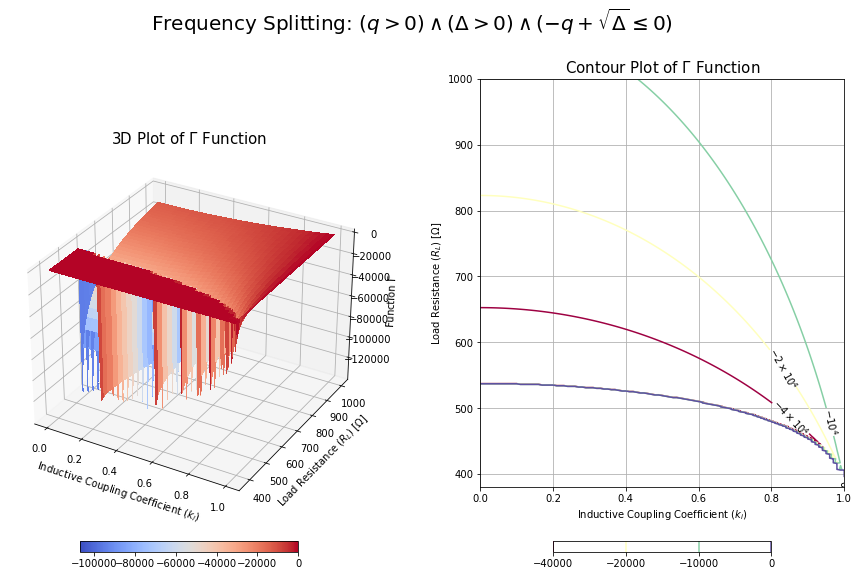

In [179]:
#interactive plotting in separate window
#%matplotlib qt 

#normal charts inside notebooks
%matplotlib inline 

# Set the plot --> size(width, height)
fig2 = plt.figure(figsize=(15,10))

################
# 1st Subplot
################

# Set the subplot for the two graphs
axs = fig2.add_subplot(1, 2, 1, projection = '3d')

# Complete figure information
fig2.suptitle('Frequency Splitting: $(q>0) \wedge (\Delta>0) \wedge (-q + \sqrt{\Delta} \leq 0)$', 
             fontsize = 20)

# For a simple 3D plot
#ax = fig.gca(projection = '3d')

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')
axs.set_zlabel('Function $\Gamma$')

# Title
axs.set_title('3D Plot of $\Gamma$ Function', fontsize = 15)

# Plot the surface
surf = axs.plot_surface(k_i_m, R_L_m, f_gamma, cmap = cm.coolwarm,
                      linewidth = 0, antialiased = False)

# Figure size (single plot)
#plt.rcParams["figure.figsize"] = (30,30)

# Add a color bar which maps values to colors.
plt.colorbar(surf, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.05)

################
# 2nd Subplot
################

# Set the subplot for the two graphs
axs = fig2.add_subplot(1, 2, 2)

# Plot the contour plot

cp = plt.contour(k_i_m, R_L_m,f_gamma, 
                 levels = [-4e4, -2e4, -1e4, 0], 
                 cmap = cm.Spectral)

# Define the levels to label
#c_labels = [0.e0]
# To specify scientific notation
fmt = ticker.LogFormatterSciNotation()

axs.clabel(cp, inline = 1, colors = 'k', fmt = fmt, fontsize = 10)

# Color bar
plt.colorbar(cp, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.1)

# Information
axs.set_title('Contour Plot of $\Gamma$ Function', fontsize = 15)

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')

axs.xaxis.grid(True)
axs.yaxis.grid(True)

# Distance between subplots
fig2.subplots_adjust(wspace=0.3)
plt.show()

## c) 3nd Condition to only have one non-trivial root: 
$(q<0) \wedge (\Delta>0) \wedge (-q - \sqrt{\Delta} \leq 0)$

- The condition $q<0$ implies $R_L < \sqrt{2}\omega L$

In [181]:
# We use the previously defined w_c, L_c, and beta_c

# RL is re-defined to comply with the condition:

# Load Resistance [ohms]
R_L = np.arange(1., (np.sqrt(2)*w_c*L_c), 1.)
print(R_L.shape)
print(f'Load Resistance interval: [{R_L[0]}, {R_L[-1]})')

(380,)
Load Resistance interval: [1.0, 380.0)


- With the previous $R_L$ values, determine:
<ol>
<li> Plot of $\Psi(R_L, k_i) = -q(R_L) - \sqrt{\Delta(R_L, k_i)} \leq 0$.
<li> Only $\Delta > 0$ are importat, so the rest will be nan.
</ol>

In [182]:
# Formula for condition Psi
Psi_c = lambda R, beta, k: -((R**2) - (2*beta)) - (np.sqrt(Delta_c(R, beta, k)))

# Create a new mesh
k_i_m, R_L_m = np.meshgrid(k_i, R_L)

print(k_i_m.shape)
print(k_i_m)
print(R_L_m.shape)
print(R_L_m)
print()

# Calculate the Psi function
f_psi= Psi_c(R_L_m, beta_c, k_i_m)
print(f'With sqrt(-1): \n {f_psi} \n')

# Since 1 is not part of the result
# Invalid values (nan) are set to 1
f_psi = np.nan_to_num(f_psi, nan = 1.)
print(f'After setting to 1: \n {f_psi} \n')

(380, 101)
[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
(380, 101)
[[  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 [  3.   3.   3. ...   3.   3.   3.]
 ...
 [378. 378. 378. ... 378. 378. 378.]
 [379. 379. 379. ... 379. 379. 379.]
 [380. 380. 380. ... 380. 380. 380.]]

With sqrt(-1): 
 [[            nan 143239.12214754 141740.019677   ...   2891.66489673
    1445.83234529      0.        ]
 [            nan 143611.91175624 141894.01763856 ...   2891.72612341
    1445.86264939      0.        ]
 [            nan             nan 142173.38925858 ...   2891.82817368
    1445.91315905      0.        ]
 ...
 [            nan             nan             nan ...             nan
              nan      0.        ]
 [            nan             nan             nan ...             nan
         

<ipython-input-182-f4cf8d1a4a28>:2: RuntimeWarning: invalid value encountered in sqrt
  Psi_c = lambda R, beta, k: -((R**2) - (2*beta)) - (np.sqrt(Delta_c(R, beta, k)))


In [183]:
# Index of an specific value
result = np.where(f_psi == 1)
print('Tuple of arrays returned : ', result)

# zip the 2 arrays to get the exact coordinates
listOfCoordinates= list(zip(result[0], result[1]))

# iterate over the list of coordinates
#for cord in listOfCoordinates:
#    print(cord)

# Just the first and last coordinate
print(f'1st: {listOfCoordinates[0]},\nlast: {listOfCoordinates[-1]} \n')

# Minimum value in sq_de
#ind = np.unravel_index(np.argmin(sq_delta, axis=None), sq_delta.shape)
#print(ind)
#print(sq_delta[ind])

Tuple of arrays returned :  (array([  0,   1,   2, ..., 379, 379, 379]), array([ 0,  0,  0, ..., 97, 98, 99]))
1st: (0, 0),
last: (379, 99) 



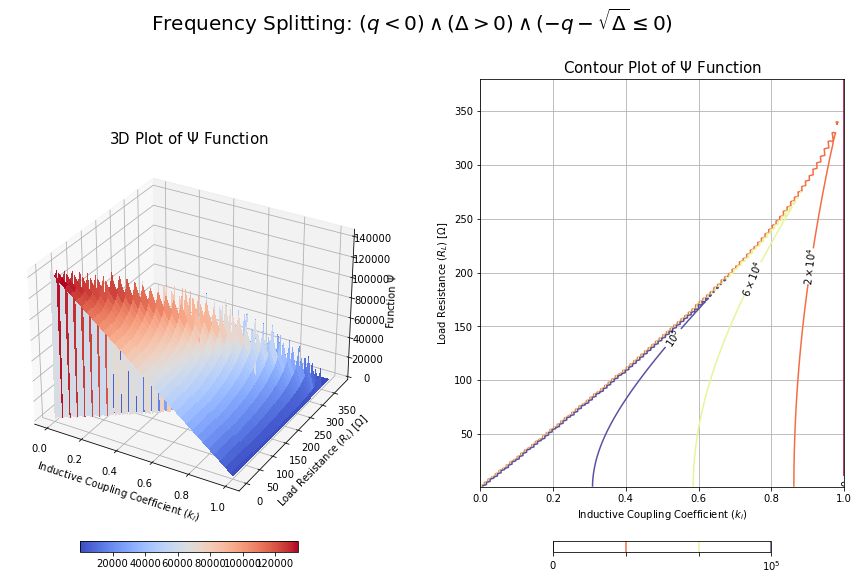

In [189]:
#interactive plotting in separate window
#%matplotlib qt 

#normal charts inside notebooks
%matplotlib inline 

# To specify scientific notation
fmt = ticker.LogFormatterSciNotation()

# Set the plot --> size(width, height)
fig = plt.figure(figsize=(15,10))

################
# 1st Subplot
################

# Set the subplot for the two graphs
axs = fig.add_subplot(1, 2, 1, projection = '3d')

# Complete figure information
fig.suptitle('Frequency Splitting: $(q<0) \wedge (\Delta>0) \wedge (-q - \sqrt{\Delta} \leq 0)$', 
             fontsize = 20)

# For a simple 3D plot
#ax = fig.gca(projection = '3d')

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')
axs.set_zlabel('Function $\Psi$')

# Title
axs.set_title('3D Plot of $\Psi$ Function', fontsize = 15)

# Plot the surface
surf = axs.plot_surface(k_i_m, R_L_m, f_psi, cmap = cm.coolwarm,
                      linewidth = 0, antialiased = False)

# Figure size (single plot)
#plt.rcParams["figure.figsize"] = (30,30)

# Add a color bar which maps values to colors.
plt.colorbar(surf, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.05)

################
# 2nd Subplot
################

# Set the subplot for the two graphs
axs = fig.add_subplot(1, 2, 2)

# Plot the contour plot

cp = plt.contour(k_i_m, R_L_m,f_psi,
                 levels = [0, 2e4, 6e4, 1e5],
                 cmap = cm.Spectral)

# Define the levels to label
#c_labels = [-2e10, 0, 1e10]

axs.clabel(cp, inline = 1, colors = 'k', fmt = fmt, fontsize = 10)

# Color bar
plt.colorbar(cp, format = fmt, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.1)

# Information
axs.set_title('Contour Plot of $\Psi$ Function', fontsize = 15)

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')

axs.xaxis.grid(True)
axs.yaxis.grid(True)

# Distance between subplots
fig.subplots_adjust(wspace=0.3)
plt.show()

# 2. Freq. Splitting Model for Active Compensation Network

- Analysis using T-Model.

In [23]:
print(np.sqrt(2)*w_c*L_c)

380.23969337934557


# 3. $\pi$-Model and $T$-Model equivalent equations

- Equivalent capacitive model for 4 plates

## $\pi$-Model:

In [47]:
# Define the symbolic variables

# Capacitance
c_1, c_2, c_M = symbols('c_1 c_2 c_M', real = True)

# Angular frequency
w = symbols('w', real = True)

In [48]:
# Common denominator
com_D = (1/(w*I))*(1/c_1 + 1/c_2 + 1/c_M)

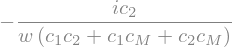

In [49]:
# T-model equivalent c'_1
Zp_1 = ((1/(w*I))**2)*((1/c_1)*(1/c_M))/com_D
simplify(Zp_1)

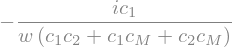

In [21]:
# T-model equivalent c'_2
Zp_2 = ((1/(w*I))**2)*((1/c_2)*(1/c_M))/com_D
simplify(Zp_2)

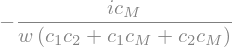

In [22]:
# T-model equivalent c'_M
Zp_M = ((1/(w*I))**2)*((1/c_1)*(1/c_2))/com_D
simplify(Zp_M)

## $T$-Model:

In [23]:
# Define the symbolic variables

# Capacitance
cp_1, cp_2, cp_M = symbols('cp_1 cp_2 cp_M', real = True)

In [24]:
# Common numerator
com_N = ((1/(w*I))**2)*((1/(cp_1*cp_M)) + (1/(cp_1*cp_2)) + (1/(cp_M*cp_2)))

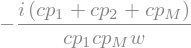

In [25]:
# Pi-model equivalent c_1
Z_1 = (com_N)/(1/(w*cp_2*I))
simplify(Z_1)

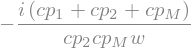

In [26]:
# Pi-model equivalent c_2
Z_2 = (com_N)/(1/(w*cp_1*I))
simplify(Z_2)

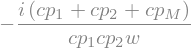

In [27]:
# Pi-model equivalent c_M
Z_M = (com_N)/(1/(w*cp_M*I))
simplify(Z_M)